In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

dataset = pd.read_csv('Auto-1.csv', sep=',')


dataset = dataset.replace('?', np.nan).dropna()
dataset.isna().sum() # check null data 
dataset.duplicated().sum() # check duplicate data

dataset = dataset.assign( horsepower = pd.to_numeric(dataset.horsepower))  # convert into method later

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


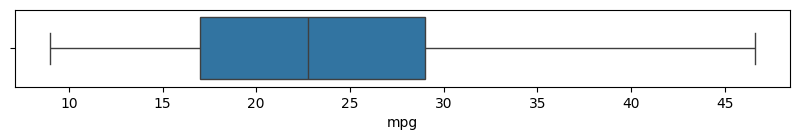

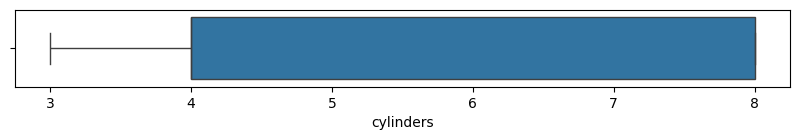

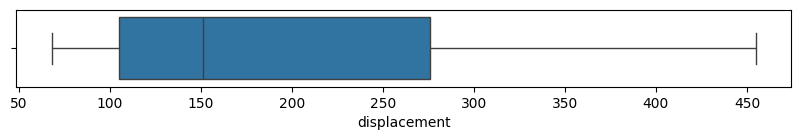

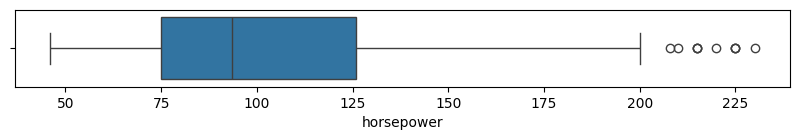

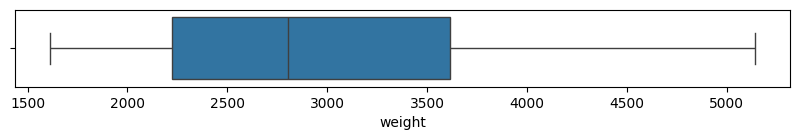

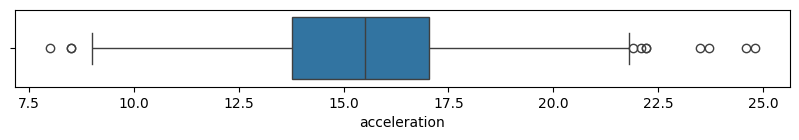

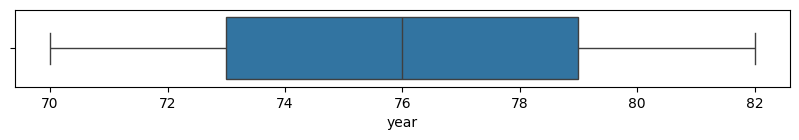

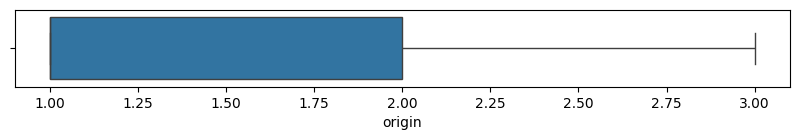

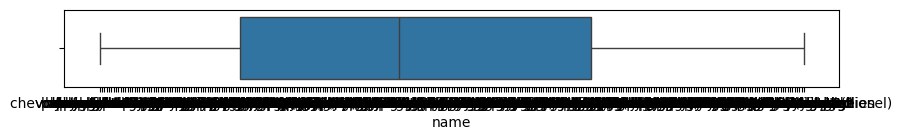

In [2]:
for i in dataset:
    plt.figure(figsize = (10,1))
    sns.boxplot(x = dataset[i])
    plt.show()


The Bayesian Information Criterion, often abbreviated BIC, is a metric that is used to compare the goodness of fit of different regression models.

In practice, we fit several regression models to the same dataset and choose the model with the lowest BIC value as the model that best fits the data.

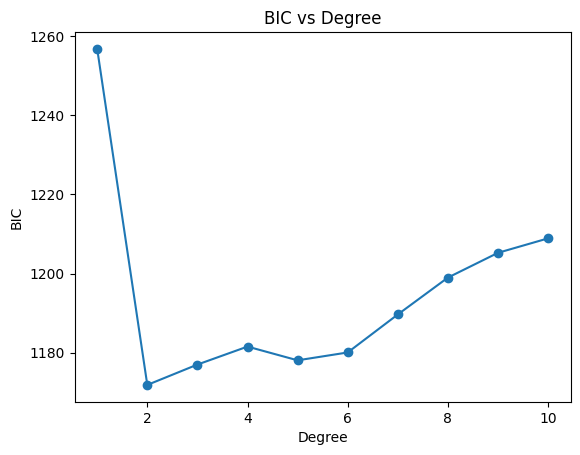

Best-fit dimensional equation: degree = 2
Intercept: 56.900099702112854
Coefficients: [ 0.         -0.46618963  0.00123054]


In [3]:
from sklearn.preprocessing import PolynomialFeatures

def fit_best_dimension(x, y, max_degree):
    bics = []
    models = []
    
    for degree in range(1, max_degree + 1):

        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(X_poly, y)
        
        # Calculate BIC
        n = len(x)
        k = degree + 1  # Number of parameters 
        rss = np.sum((model.predict(X_poly) - y) ** 2)  # Residual sum of squares
        bic = n * np.log(rss / n) + k * np.log(n)  # Bayesian Information Criterion
        
        bics.append(bic)
        models.append(model)
    
    best_degree = np.argmin(bics) + 1
    best_model = models[best_degree - 1]
    
    # Visualizing
    plt.plot(range(1, max_degree + 1), bics, marker='o')
    plt.xlabel('Degree')
    plt.ylabel('BIC')
    plt.title('BIC vs Degree')
    plt.show()
    
    return best_degree, best_model

X, Y = dataset.iloc[:, 3], dataset.iloc[:, 0]
X = X.values
Y = Y.values

best_degree, best_model = fit_best_dimension(X, Y, max_degree=10)
print("Best-fit dimensional equation: degree =", best_degree)
print("Intercept:", best_model.intercept_)
print("Coefficients:", best_model.coef_)




# Make Polynomial Data 

In [ ]:

class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree

    def fit_transform(self, X):
        n_samples, n_features = X.shape
        X_poly = np.ones((n_samples, 1))

        for d in range(1, self.degree + 1):
            X_poly = np.hstack((X_poly, X ** d))

        return X_poly

X, Y = dataset.iloc[:, 3], dataset.iloc[:, 0]
X = X.values.reshape(-1, 1)

degree = 3
poly_features = PolynomialFeatures(degree)
X_poly = poly_features.fit_transform(X)

print(X_poly)


/var/folders/kw/29kdjxq94bb0p2jkdd39pxsw0000gn/T/ipykernel_94802/311854838.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 1)


array([130])

array([1.00e+00, 1.30e+02, 1.69e+04])

MSE	Linear : 23.94,	Quadratic: 18.98,\ 5th: 18.43
R2	Linear : 0.61,	Quadratic: 0.69,\ 5th: 0.70


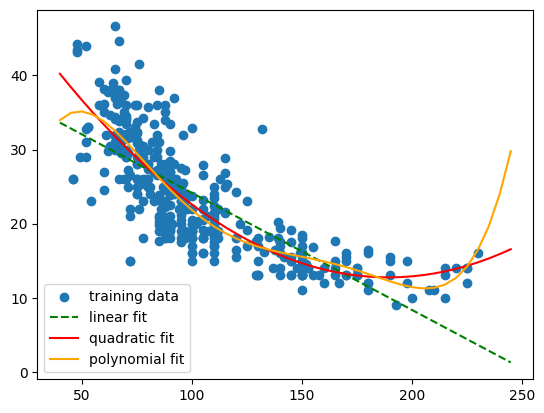

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

X = dataset["horsepower"].values.reshape(-1, 1)
y = dataset["mpg"].values

lr = LinearRegression()
qr = LinearRegression()
pr = LinearRegression()
X_range = np.arange(min(X), max(X), 1)
X_range_poly = X_range.reshape(-1, 1)
# 기본 다항식 형태 생성
# include_bias=True로 할 경우 0차항(1)도 함께 만든다. defualt값 True
quadratic = PolynomialFeatures(degree=2, include_bias=True)
polynomial = PolynomialFeatures(degree=5, include_bias=True)
# 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변형해준다
# 1과 주어진 값과 주어진 값을 제곱한 항을 추가하여 반환
X_quad = quadratic.fit_transform(X)
X_poly = polynomial.fit_transform(X)

display(X[0], X_quad[0]) # array([258]), array([1.0000e+00, 2.5800e+02, 6.6564e+04])

# 비교를 위해 단순 회귀 계산
lr.fit(X, y)
X_fit = np.arange(40, 250, 5)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 다항 회귀를 위해 변형된 모델에 다중 회귀 모델 계산
qr.fit(X_quad, y)
y_quad_fit = qr.predict(quadratic.transform(X_fit))

pr.fit(X_poly, y)
y_poly_fit = pr.predict(polynomial.transform(X_fit))

y_lin_pred = lr.predict(X)
y_quad_pred = qr.predict(X_quad)
y_poly_pred = pr.predict(X_poly)


mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
mse_poly = mean_squared_error(y, y_poly_pred)


r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
r2_poly = r2_score(y, y_poly_pred)


print(f'MSE\tLinear : {mse_lin:.2f},\tQuadratic: {mse_quad:.2f},\ 5th: {mse_poly:.2f}')
print(f'R2\tLinear : {r2_lin:.2f},\tQuadratic: {r2_quad:.2f},\ 5th: {r2_poly:.2f}')

plt.scatter(X, y, label='training data')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--', color='g')
plt.plot(X_fit, y_quad_fit, label='quadratic fit', color='r')
plt.plot(X_fit, y_poly_fit, label='polynomial fit', color='orange')

plt.legend(loc=3)
plt.show()


# linear fit 

Coefficients: w = -0.7784267838977758 b = 1.450087215836939e-16
R squared: 0.6593654515909223
Mean Absolute Error: 0.48434896657127574
Mean Square Error: 0.38616582790044457
Root Mean Square Error: 0.6959518421351263


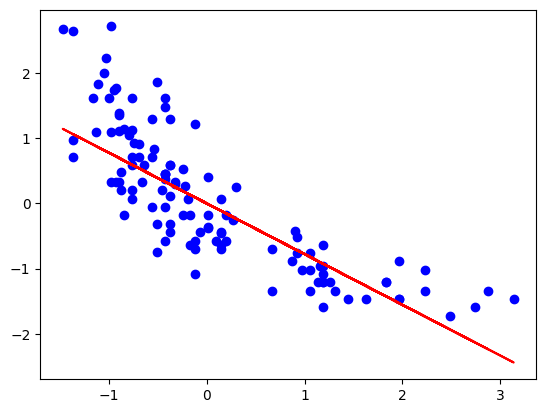

In [26]:
X, Y = dataset.iloc[:,3], dataset.iloc[:,0]

# Convert the data to NumPy arrays
X = X.values
y = Y.values

def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X
X = standardize(X)
y = standardize(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)


# Implement the gradient descent algorithm with a learning rate scheduler
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

def linear_regression_gradient_descent(x, y, learning_rate_scheduler, epochs):
    best_w = None
    best_b = None
    best_loss = float('inf')
    
    for epoch in range(epochs):
        learning_rate = learning_rate_scheduler(epoch)
        
        w = 0
        b = 0
        n = len(x)
        
        y_pred = w * x + b
        error = y_pred - y
        
        # the gradients 
        dw = (1/n) * np.dot(x, error)
        db = (1/n) * np.sum(error)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        loss = np.mean((w * x + b - y) ** 2)
        
        if loss < best_loss:
            best_w = w
            best_b = b
            best_loss = loss
    
    return best_w, best_b

def learning_rate_schedule(epoch):
    if epoch < 100:
        return 1
    elif epoch < 500:
        return 0.05
    else:
        return 0.005


num_iterations = 1000

w, b = linear_regression_gradient_descent(X, y, learning_rate_schedule, num_iterations)

y_pred = w * X_test + b

print("Coefficients: w =", w, "b =", b)

# #Model Evaluation
from sklearn import metrics
 # Evaluate the model
print('R squared:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:',  np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))


plt.scatter(X_test, y_test, color='blue')
# Plot the predicted model
plt.plot(X_test, y_pred, color='red')
plt.show()


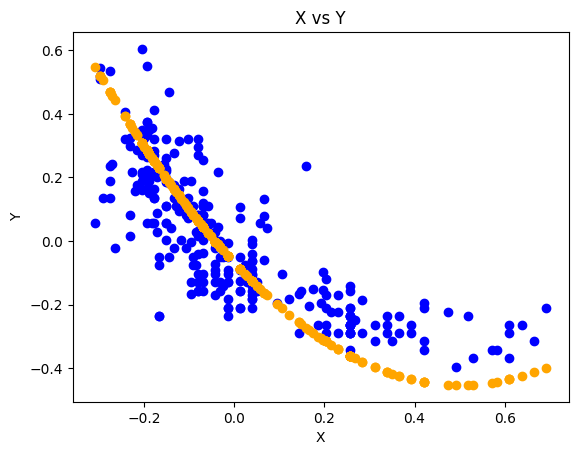

R squared:  0.6876629129714281
Mean Absolute Error: 3.318725062283301
Mean Square Error: 20.013997609473957
Root Mean Square Error: 4.473700661585882


In [31]:
import math

class QuadraticRegression() :
	
	def __init__( self, degree, learning_rate, iterations ) :
		
		self.degree = degree
		self.learning_rate = learning_rate		
		self.iterations = iterations
			
	def transform( self, X ) :
		
		# initialize X_transform
		X_transform = np.ones( ( self.m, 1 ) )
		j = 0
		for j in range( self.degree + 1 ) :
			
			if j != 0 :
				x_pow = np.power( X, j )
				X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
		return X_transform 
		
	def normalize( self, X ) :
		
		X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
		return X
		
	# model training
	
	def fit( self, X, Y ) :
		
		self.X = X
		self.Y = Y
		self.m, self.n = self.X.shape

		self.W = np.zeros( self.degree + 1 )
	
		X_transform = self.transform( self.X )
		X_normalize = self.normalize( X_transform )
				
		# gradient descent learning
		for i in range( self.iterations ) :
			
			h = self.predict( self.X )
			error = h - self.Y
			self.W = self.W - self.lr_exp_decay(i) * ( 1 / self.m ) * np.dot( X_normalize.T, error ) 
		
		return self

	def predict( self, X ) :	

		X_transform = self.transform( X )
		X_normalize = self.normalize( X_transform )
		
		return np.dot( X_transform, self.W )

	def lr_exp_decay(self, epoch):

		k = 0.0005  #deca
		lrate=self.learning_rate * math.exp(-k*epoch)

		return lrate
	def standardize(self,data):
    		return (data - np.mean(data))/(np.max(data) - np.min(data))

def main() : 
	
	X, Y = dataset.iloc[:,3], dataset.iloc[:,0]
	X = X.values
	Y = Y.values
	
	# model training
	
	X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
	resulting_array = X_train.reshape(-1, 1)
	test_array = X_test.reshape(-1,1)
	
	model = QuadraticRegression( degree = 2, learning_rate = 0.1, iterations = 5000 )

	model.fit( resulting_array, y_train )
	
	# Prediction on training set
	
	normalizeX = model.standardize(X_train)
	normalizeY = model.standardize(y_train)
	Y_pred = model.predict( resulting_array )
	normalize_predY = model.standardize(Y_pred)

	# Visualization 
	plt.scatter( normalizeX, normalizeY, color = 'blue' )
	plt.scatter( normalizeX, normalize_predY, color = 'orange' )
	plt.title( 'X vs Y' )
	plt.xlabel( 'X' )
	plt.ylabel( 'Y' )	
	plt.show()

	from sklearn import metrics
	meanAbErr = metrics.mean_absolute_error(y_train, Y_pred)
	meanSqErr = metrics.mean_squared_error(y_train, Y_pred)
	rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, Y_pred))
	#rsquare = r_squared(y_test, y_pred)
	rsquare=r2_score(y_train, Y_pred)
	print('R squared: ', rsquare)
	print('Mean Absolute Error:', meanAbErr)
	print('Mean Square Error:', meanSqErr)
	print('Root Mean Square Error:', rootMeanSqErr)

if __name__ == "__main__" : 
	
	main()


degree 5 -> not working yet 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 235 is different from 1)

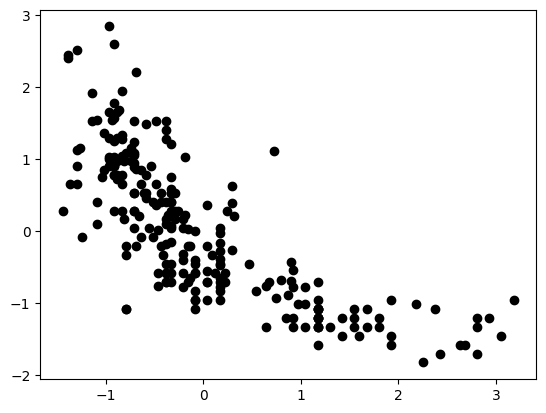

In [32]:
def normalize(X):
        return (X - np.mean(X)) / np.std(X)

X, Y = dataset.iloc[:, 3], dataset.iloc[:, 0]
X = X.values
Y = Y.values

# Model training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
resulting_array = X_train.reshape(-1, 1)
test_array = X_test.reshape(-1, 1)

# Prediction on training set
normalizeX = normalize(resulting_array)
normalizeY = normalize(y_train)

def error_list(w_1,w_2,w_3,w_4,w_5):
    #y_pred = (w_1 * x**4) +(w_2 * x**3)+ (w_3 * x**2) +(w_4 * x) + w_5
    y_pred = []
    for i in range(0,len(normalizeX)):
        y_pred.append((w_1*(normalizeX[i])**4)+ (w_2*(normalizeX[i])**3)+ (w_3*(normalizeX[i])**2) + (w_4*(normalizeX[i])) + w_5)
    # error = y - y_pred
    error = []
    for j in range(0,len(normalizeX)):
        error.append(normalizeY[j] - y_pred[j])
    return error


def fit_and_plot(x,y,iterate,learning_rate):
    global w_1
    global w_2
    global w_3
    global w_4
    global w_5
    w_1 = 0
    w_2 = 0
    w_3 = 0
    w_4 = 0
    w_5 = 0

    for i in range(0,iterate): 
        errors = error_list(w_1,w_2,w_3,w_4,w_5)
       
        fourth = [i**4 for i in normalizeX]
        w_1 += np.matmul(errors,fourth) * learning_rate
       
        third = [i**3 for i in normalizeX]
        w_2 += np.matmul(errors,third) * learning_rate
      
        second = [i**2 for i in normalizeX]
        w_3 += np.matmul(errors,second) * learning_rate
       
        w_4 += np.matmul(errors,normalizeX) * learning_rate
       
        w_5 += sum(errors)* learning_rate
        print("mean squared_error", sum([i**2 for i in errors])/(2*len(errors))) 
    print(w_1,w_2,w_3,w_4,w_5)
    y_pred = []
    for i in range (0,len(normalizeY)):
         y_pred.append((w_1*(normalizeX[i])**4)+ (w_2*(normalizeX[i])**3)+ (w_3*(normalizeX[i])**2) + (w_4*(normalizeX[i])) + w_5)
    plt.plot(x,y_pred,'*',color='blue') #showing best fitted curve
def predict(x):
    y = []
    for x_value in x:
        y.append((w_1*(x_value)**4)+ (w_2*(x_value)**3)+ (w_3*(x_value)**2) + (w_4*(x_value)) + w_5)
    return y

plt.plot(normalizeX,normalizeY, 'o',color='black')
fit_and_plot(normalizeX,normalizeY,5000,0.01)   
y_predd = predict(normalizeX)
